# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1 Козловский Евгений, БЭК141
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/macbook/anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None,
                 names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [5]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [8]:
print('Средний возраст мужчин = '+str(df[df['sex']=='Male']['age'].mean()))

Средний возраст мужчин = 39.43354749885268


In [6]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

### Вопрос 3
Какова доля граждан США?

In [9]:
print('Доля граждан США = '+str(df[df['native-country']=='United-States'].shape[0]/df.shape[0]))

Доля граждан США = 0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

In [28]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [77]:
education_names = df['education'].value_counts().index
education_counts = df['education'].value_counts().get_values()
education_counts1=[]
for i in range(len(education_counts)):
    education_counts1.append(np.float(education_counts[i]))

In [79]:
x=np.arange(len(education_names))

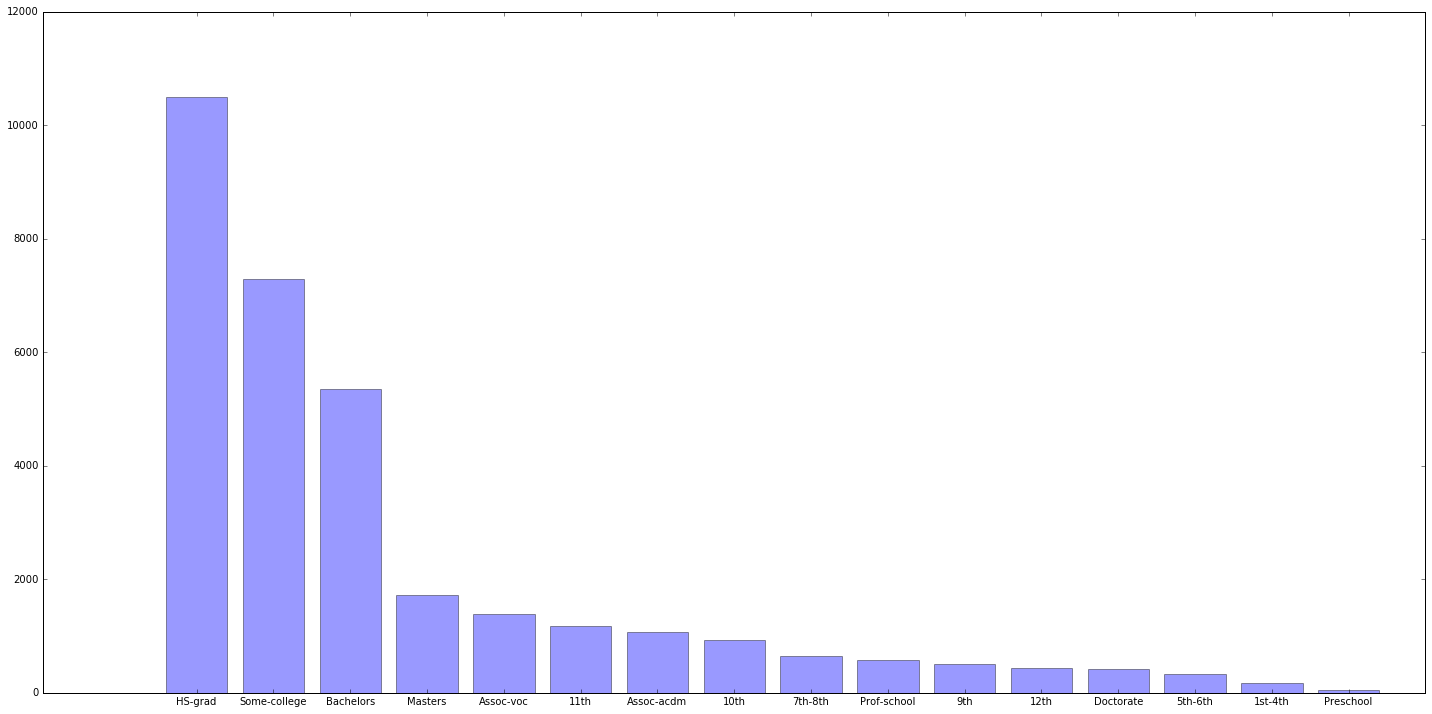

In [92]:
plt.figure(figsize=(20,10))
plt.bar(x, education_counts1, align='center', alpha=0.4)
plt.xticks(x, education_names)
plt.tight_layout()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [26]:
df['fnlwgt'][df['marital-status']=='Divorced'].describe()[1:3]

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [29]:
df[df['50K']=='>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

Посчитаем долю людей без высшего образования как ($1-$доля людей со степенями бакалавра, магистра и доктора).

In [21]:
df[(df['50K']=='>50K')&((df['education']=='Bachelors')|(df['education']=='Masters')|(df['education']=='Doctorate'))].shape[0]/df[df['50K']=='>50K'].shape[0]

0.4445861497258003

Таким образом, более половины людей с доходом более 50к не имеют полноценного законченного высшего образования. Поэтому ответ на поставленный вопрос - нет.

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [30]:
df.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [53]:
df[df['occupation']=='Farming-fishing']['native-country'].value_counts()

United-States    879
Mexico            77
Puerto-Rico        5
?                  5
Guatemala          4
Philippines        4
Cuba               2
Canada             2
Vietnam            2
Italy              2
El-Salvador        2
Japan              1
Portugal           1
France             1
Poland             1
Hong               1
Cambodia           1
Ireland            1
Germany            1
England            1
Yugoslavia         1
Name: native-country, dtype: int64

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [55]:
df[(df['sex']=='Male')&(df['education']=='Bachelors')].shape[0]/df[(df['sex']=='Male')&(df['education']=='Masters')].shape[0]

3.14743049705139

In [56]:
df[(df['sex']=='Female')&(df['education']=='Bachelors')].shape[0]/df[(df['sex']=='Female')&(df['education']=='Masters')].shape[0]

3.0205223880597014

Отношение количества мужчин-бакалавров к количеству мужчин магистров больше, чем отношение количества женщин-бакалавров к количеству женщин магистров

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [10]:
print('Максимальное количество рабочих часов в неделю = '+str(df['hours-per-week'].max()))

Максимальное количество рабочих часов в неделю = 99


In [11]:
print('Кол-во людей, работающих 99 часов в неделю = '+str(df[df['hours-per-week']==99].shape[0]))

Кол-во людей, работающих 99 часов в неделю = 85


Распределение заработков данных людей

In [93]:
df[df['hours-per-week']==99]['50K'].value_counts()

<=50K    60
>50K     25
Name: 50K, dtype: int64